<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica22_NormalizacionTransformacion_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 22: Normalización y transformación de datos**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---



## **Ejercicio 1: Normalización Min-Max**
---
1. Cargar el dataset wine de sklearn.
2. Seleccionar una de las características numéricas (por ejemplo, alcohol).
3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4. Aplicar la normalización Min-Max a los datos seleccionados.
5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7. Responder las preguntas siguientes.

In [2]:
# 1. Cargar el dataset wine de sklearn.
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# 2. Seleccionar una de las características numéricas (por ejemplo, alcohol).
# 3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
import scipy.stats as stats
from scipy.stats import shapiro
magnesium = df['magnesium']
prueba_normalidad = shapiro(magnesium)
print(prueba_normalidad)

ShapiroResult(statistic=np.float64(0.9383312109016513), pvalue=np.float64(6.345693783266514e-07))


In [4]:
# 4. Aplicar la normalización Min-Max a los datos seleccionados.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
magnesium_scaled = scaler.fit_transform(magnesium.values.reshape(-1, 1))
print(magnesium_scaled[:10])


[[0.61956522]
 [0.32608696]
 [0.33695652]
 [0.4673913 ]
 [0.52173913]
 [0.45652174]
 [0.2826087 ]
 [0.55434783]
 [0.29347826]
 [0.30434783]]


In [5]:
# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
prueba_normalidad_scaled = shapiro(magnesium_scaled)
print(prueba_normalidad_scaled)

ShapiroResult(statistic=np.float64(0.9383312109016513), pvalue=np.float64(6.345693783266514e-07))


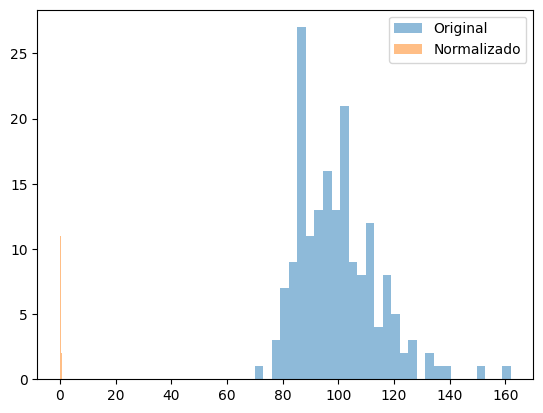

In [15]:
# 6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
import matplotlib.pyplot as plt
plt.hist(magnesium, bins=30, alpha=0.5, label='Original')
plt.hist(magnesium_scaled, bins=30, alpha=0.5, label='Normalizado')
plt.legend(loc='upper right')

**Preguntas:**
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?

## **Ejercicio 2: Normalización Z-Score**
---
1. Cargar el dataset wine de sklearn.
2. Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4. Aplicar la normalización Z-Score a los datos seleccionados.
5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7. Responder las preguntas siguientes.




In [7]:
# 1. Cargar el dataset wine de sklearn.
# 2. Seleccionar una de las características numéricas (por ejemplo, malic_acid).
# 3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
malic_acid = df['malic_acid']
prueba_normalidad = shapiro(malic_acid)
print(prueba_normalidad)

ShapiroResult(statistic=np.float64(0.8887839752895415), pvalue=np.float64(2.945800703600761e-10))


In [8]:
# 4. Aplicar la normalización Z-Score a los datos seleccionados.
normalization = (malic_acid - malic_acid.mean()) / malic_acid.std()
print(normalization[:10])

0   -0.560668
1   -0.498009
2    0.021172
3   -0.345835
4    0.227053
5   -0.515911
6   -0.417446
7   -0.166807
8   -0.623328
9   -0.882918
Name: malic_acid, dtype: float64


In [9]:
# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
prueba_normalidad_scaled = shapiro(normalization)
print(prueba_normalidad_scaled)

ShapiroResult(statistic=np.float64(0.8887839752895411), pvalue=np.float64(2.9458007036006436e-10))


Text(0.5, 1.0, 'Distribución de malic_acid')

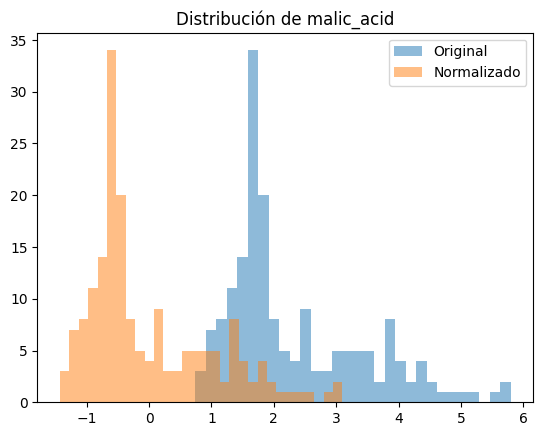

In [14]:
# 6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
import seaborn as sns
plt.hist(malic_acid, bins=30, alpha=0.5, label='Original')
plt.hist(normalization, bins=30, alpha=0.5, label='Normalizado')
plt.legend(loc='upper right')
plt.title('Distribución de malic_acid')

**Preguntas:**
1. ¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

## **Ejercicio 3: Transformación Logarítmica**
---
1. Cargar un conjunto de datos aleatorios generados con numpy.
2. Aplicar una transformación logarítmica (np.log) a los datos.
3. Realizar una prueba de normalidad sobre los datos originales y transformados.
4. Graficar los datos originales y transformados utilizando matplotlib.
5. Responder las preguntas siguientes.


ShapiroResult(statistic=np.float64(0.9416433360850882), pvalue=np.float64(0.00024318520339663678))
ShapiroResult(statistic=np.float64(0.6273799772331848), pvalue=np.float64(1.4694453281982122e-14))


Text(0.5, 1.0, 'Distribución de datos aleatorios')

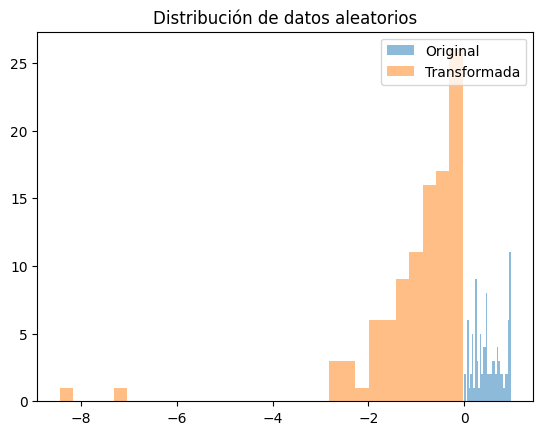

In [17]:
# 1. Cargar un conjunto de datos aleatorios generados con numpy.
import numpy as np
datos_aleatorios = np.random.rand(100)

# 2. Aplicar una transformación logarítmica (np.log) a los datos.
datos_log = np.log(datos_aleatorios)

# 3. Realizar una prueba de normalidad sobre los datos originales y transformados.
prueba_normalidad = shapiro(datos_aleatorios)
prueba_normalidad_log = shapiro(datos_log)
print(prueba_normalidad)
print(prueba_normalidad_log)

# 4. Graficar los datos originales y transformados utilizando matplotlib.
plt.hist(datos_aleatorios, bins=30, alpha=0.5, label='Original')
plt.hist(datos_log, bins=30, alpha=0.5, label='Transformada')
plt.legend(loc='upper right')
plt.title('Distribución de datos aleatorios')

**Preguntas:**
1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la transformación logarítmica?

## **Ejercicio 4: Transformación Raíz Cuadrada**
---
1. Cargar un conjunto de datos aleatorios generados con numpy.
2. Aplicar una transformación de raíz cuadrada a los datos.
3. Realizar una prueba de normalidad sobre los datos originales y transformados.
4. Graficar los datos originales y transformados utilizando matplotlib.
5. Responder las preguntas siguientes.


ShapiroResult(statistic=np.float64(0.9504292742086241), pvalue=np.float64(0.0008854840396398387))
ShapiroResult(statistic=np.float64(0.9254908502846524), pvalue=np.float64(2.7863722706564905e-05))


Text(0.5, 1.0, 'Distribución de datos aleatorios')

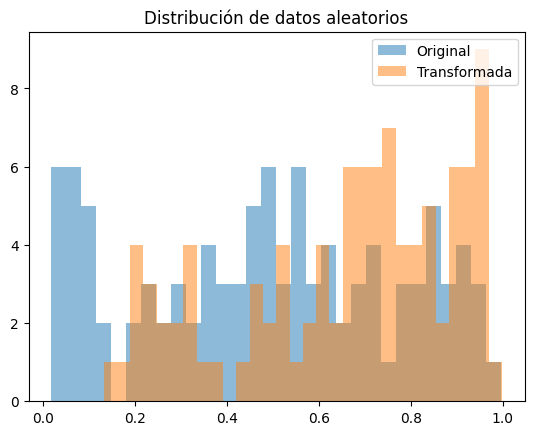

In [19]:
# 1. Cargar un conjunto de datos aleatorios generados con numpy.
datos_aleatorios2 = np.random.rand(100)

# 2. Aplicar una transformación de raíz cuadrada a los datos.
datos_raiz = np.sqrt(datos_aleatorios2)

# 3. Realizar una prueba de normalidad sobre los datos originales y transformados.
prueba_normalidad2 = shapiro(datos_aleatorios2)
prueba_normalidad_raiz = shapiro(datos_raiz)
print(prueba_normalidad2)
print(prueba_normalidad_raiz)

# 4. Graficar los datos originales y transformados utilizando matplotlib.
plt.hist(datos_aleatorios2, bins=30, alpha=0.5, label='Original')
plt.hist(datos_raiz, bins=30, alpha=0.5, label='Transformada')
plt.legend(loc='upper right')
plt.title('Distribución de datos aleatorios')

**Preguntas:**

1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2. ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?

## **Ejercicio 5: Transformación Box-Cox Instrucciones**
---
1. Cargar un conjunto de datos aleatorios generados con numpy.
2. Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3. Realizar una prueba de normalidad sobre los datos originales y transformados.
4. Graficar los datos originales y transformados utilizando matplotlib.
5. Responder las preguntas siguientes.

ShapiroResult(statistic=np.float64(0.9342185589470352), pvalue=np.float64(8.707504585500519e-05))
ShapiroResult(statistic=np.float64(0.9344065443500099), pvalue=np.float64(8.930804328778908e-05))


Text(0.5, 1.0, 'Distribución de datos aleatorios')

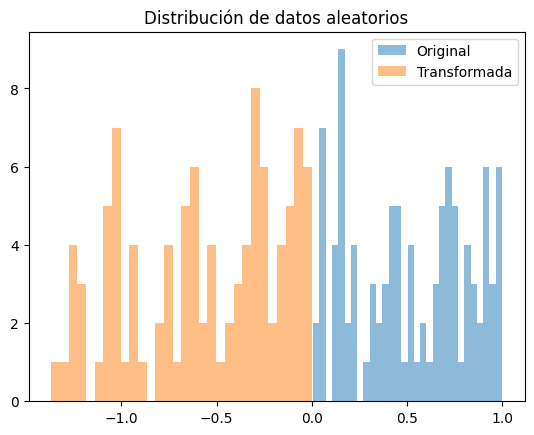

In [20]:
# 1. Cargar un conjunto de datos aleatorios generados con numpy.
datos_aleatorios3 = np.random.rand(100)

# 2. Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
transformacion_boxcox, lambda_boxcox = stats.boxcox(datos_aleatorios3)

# 3. Realizar una prueba de normalidad sobre los datos originales y transformados.
prueba_normalidad3 = shapiro(datos_aleatorios3)
prueba_normalidad_boxcox = shapiro(transformacion_boxcox)
print(prueba_normalidad3)
print(prueba_normalidad_boxcox)

# 4. Graficar los datos originales y transformados utilizando matplotlib.
plt.hist(datos_aleatorios3, bins=30, alpha=0.5, label='Original')
plt.hist(transformacion_boxcox, bins=30, alpha=0.5, label='Transformada')
plt.legend(loc='upper right')
plt.title('Distribución de datos aleatorios')

**Preguntas:**
1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2. ¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?